In [1]:
import json
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,ENGLISH_STOP_WORDS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD,NMF,LatentDirichletAllocation
from sklearn.preprocessing import MaxAbsScaler
from matplotlib.dates import DateFormatter, WeekdayLocator
%matplotlib inline

dat1 = pd.read_csv('data/2020/census_tweets_month_1.csv')
dat2 = pd.read_csv('data/2020/census_tweets_month_2.csv')
dat3 = pd.read_csv('data/2020/census_tweets_month_3.csv')
dat4 = pd.read_csv('data/2020/census_tweets_month_4.csv')
dat5 = pd.read_csv('data/2020/census_tweets_month_5.csv')
data = pd.concat([dat1,dat2,dat3,dat4,dat5])
data['date'] = pd.to_datetime(data['date'])

In [2]:
pre_covid = data[data['date'] < '2020-03-10']
post_covid = data[data['date'] >= '2020-03-10']
words_pre = pre_covid.text
words_post = post_covid.text
words_pre = words_pre[~pd.isnull(words_pre)]
words_post = words_post[~pd.isnull(words_post)]

stops = ENGLISH_STOP_WORDS.union(['2020','www','http','2020census','census2020','https','com','dlvr','utm_source','census','bit','org','gov','ow','ly','txt','cgi','pi','buff'])
stops = stops.union(['0' + str(i) for i in range(10)])
stops = stops.union([str(i) for i in range(500)])

<BarContainer object of 50 artists>

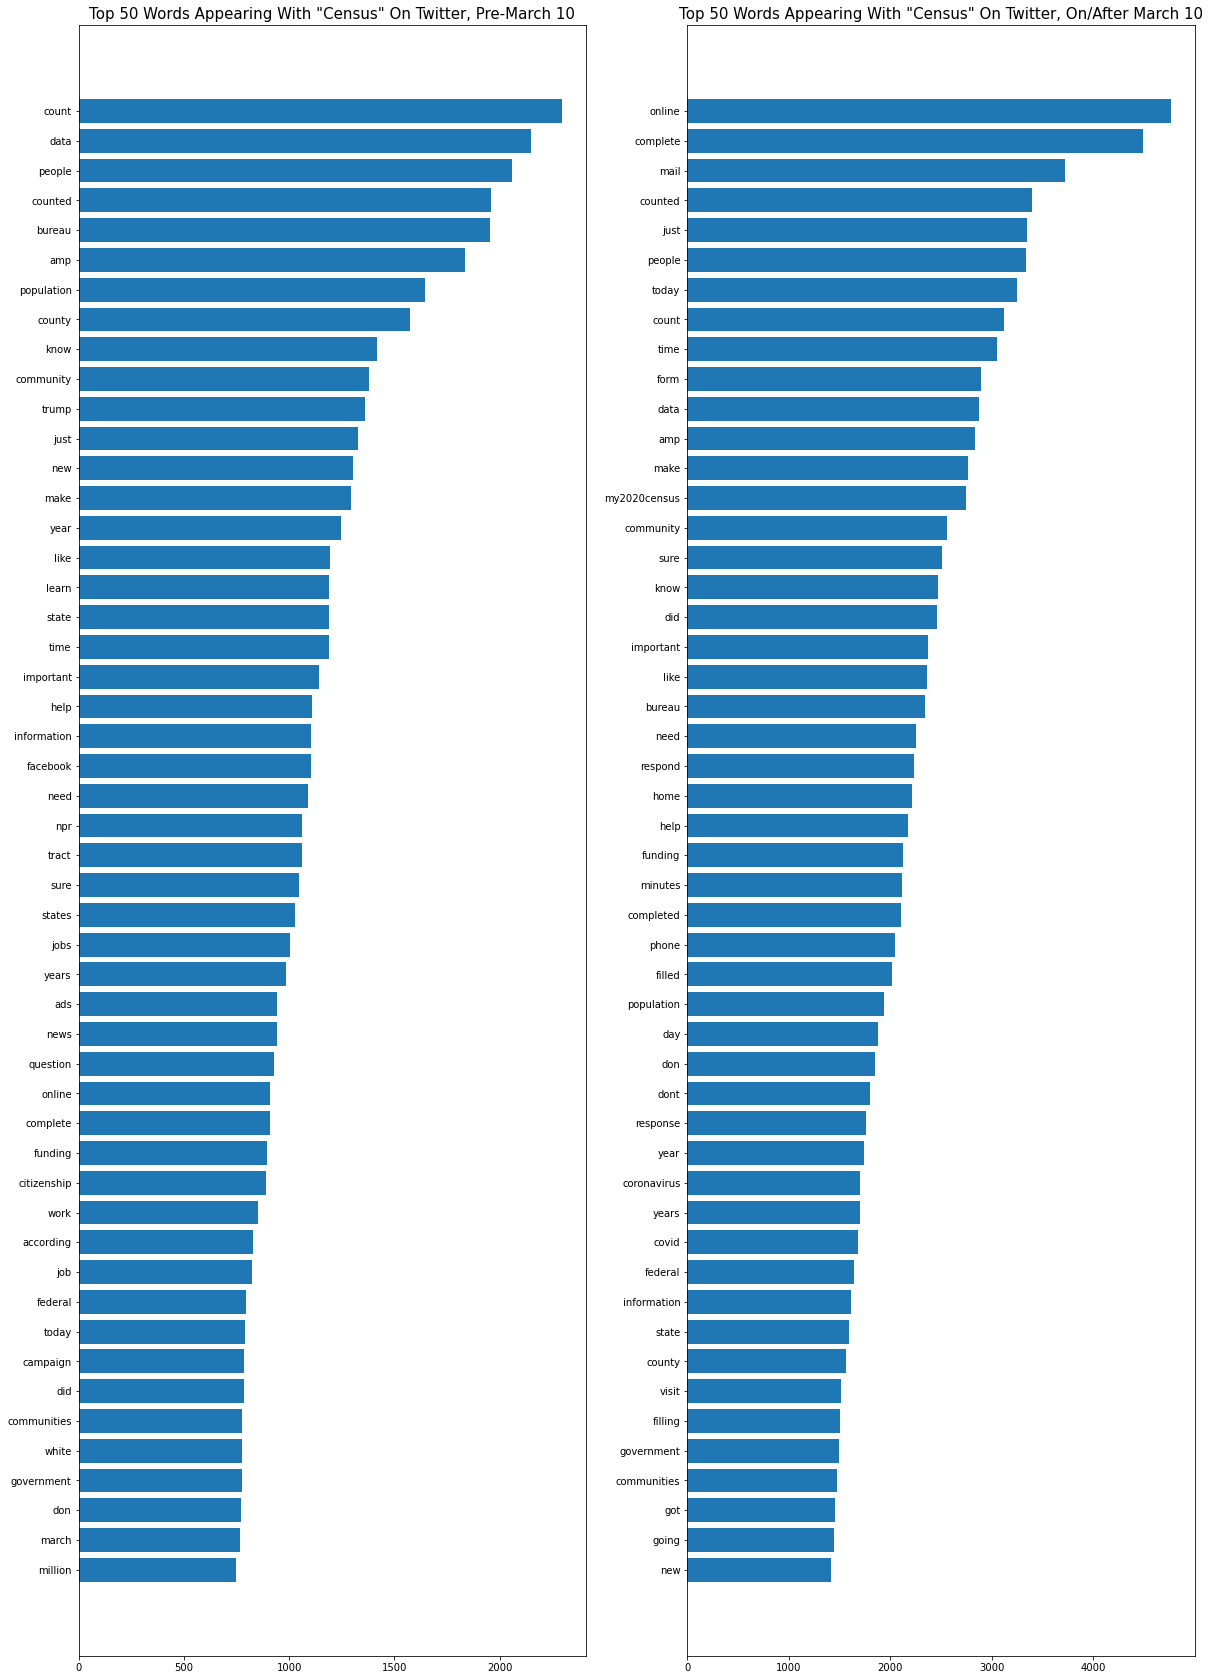

In [3]:
fig,axes = plt.subplots(1,2,figsize=(20,30))
ax = axes.ravel()
cv_pre = TfidfVectorizer(stop_words=stops,lowercase=True,strip_accents='ascii',min_df=10)
counts = cv_pre.fit_transform(words_pre)
ax[0].set_title('Top 50 Words Appearing With "Census" On Twitter, Pre-March 10',size=15)
freq = pd.Series(np.sum(counts,axis=0).A1,index= cv_pre.get_feature_names())
top = freq.sort_values(ascending=False)[:50][::-1]
ax[0].barh(top.index,top.values)
cv_post = TfidfVectorizer(stop_words=stops,lowercase=True,strip_accents='ascii',min_df=10)
counts = cv_post.fit_transform(words_post)
ax[1].set_title('Top 50 Words Appearing With "Census" On Twitter, On/After March 10',size=15)
freq = pd.Series(np.sum(counts,axis=0).A1,index= cv_post.get_feature_names())
top = freq.sort_values(ascending=False)[:50][::-1]
ax[1].barh(top.index,top.values)

In [5]:
freq = pd.Series(np.sum(counts,axis=0).A1,index= cv_pre.get_feature_names())
top = freq.sort_values(ascending=False)[:100][::-1]

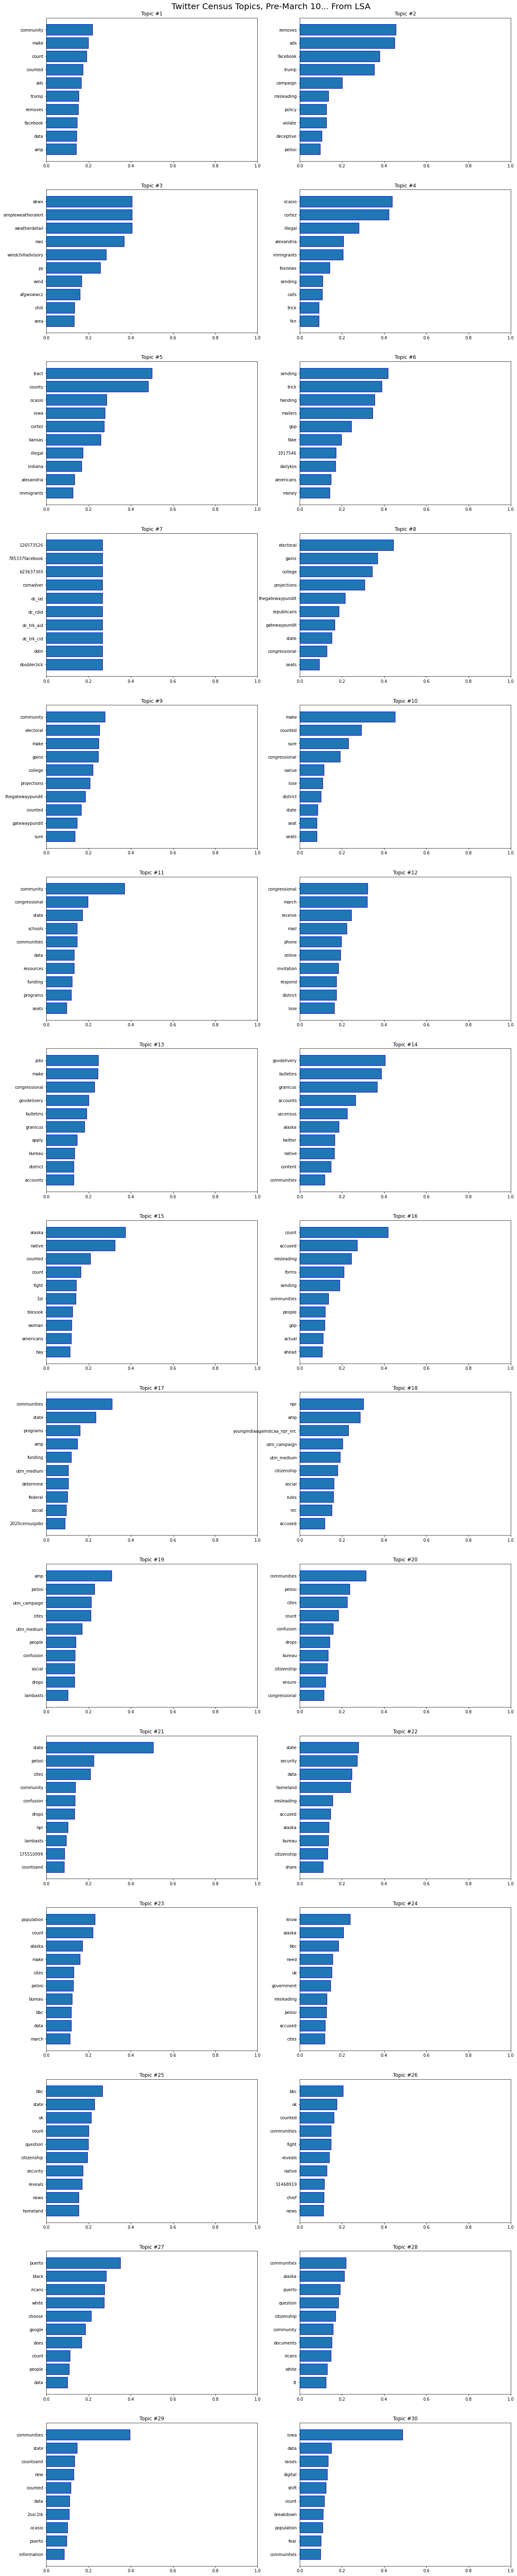

In [6]:
cv_pre = TfidfVectorizer(stop_words=stops,lowercase=True,strip_accents='ascii',min_df=10)
counts = cv_pre.fit_transform(words_pre)
scaler = MaxAbsScaler()
X_scaled_pre = scaler.fit_transform(counts)
lsa = TruncatedSVD(n_components=30)
X_lsa = lsa.fit_transform(X_scaled_pre)
top12 = lsa.components_
fig,ax = plt.subplots(15,2,figsize=(20,100))
plt.suptitle('Twitter Census Topics, Pre-March 10... From LSA',size=20)
plt.subplots_adjust(top=0.975)
axes = ax.ravel()
names = cv_pre.get_feature_names()
plt.rc('xtick', labelsize=10)  
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()
    axes[i].set_xlim(0,1)

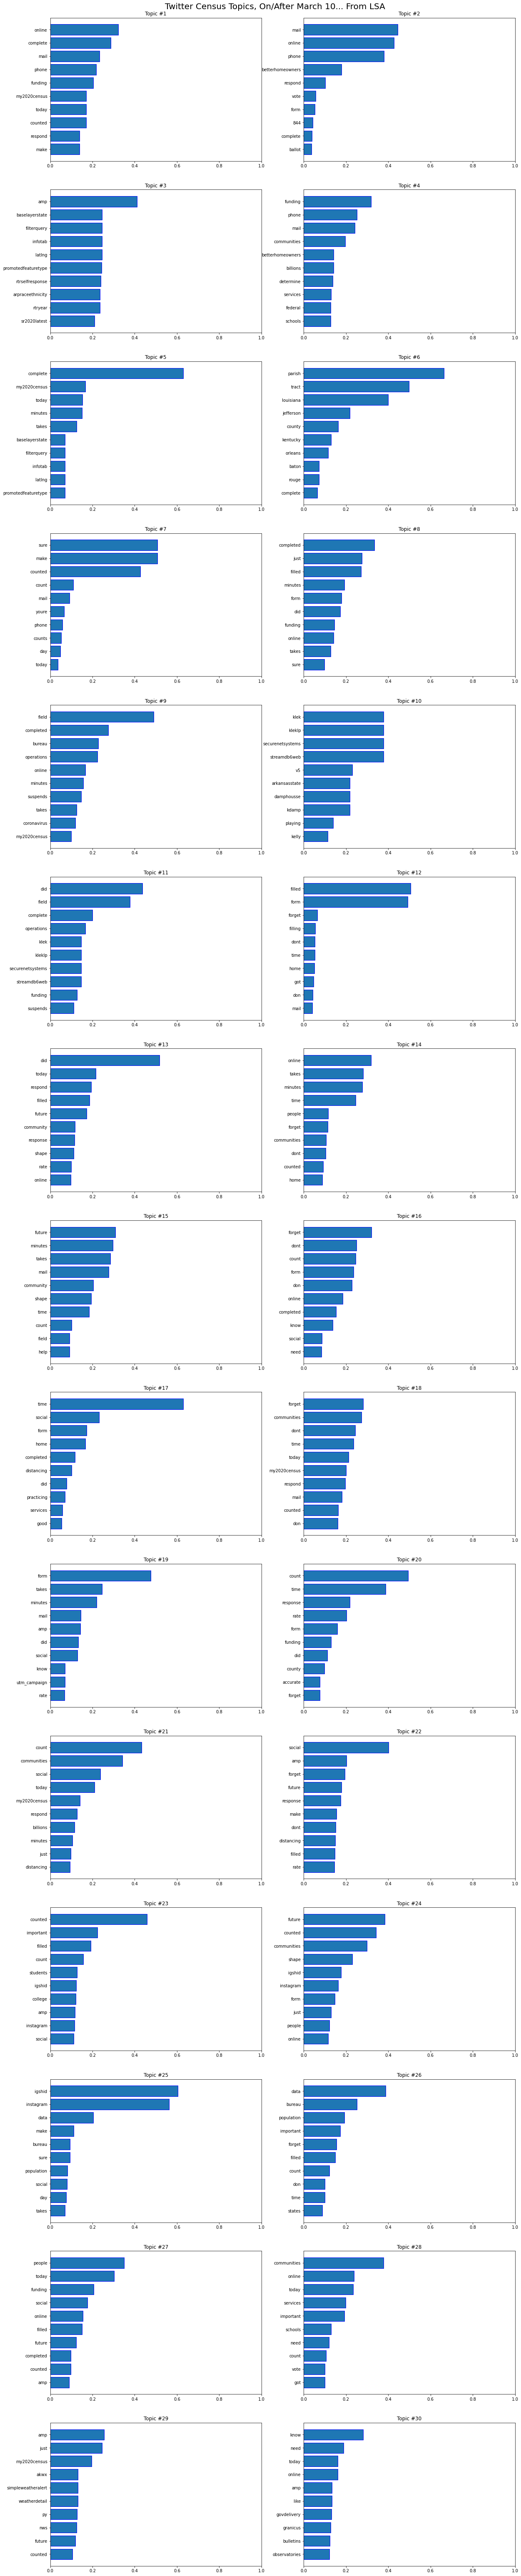

In [7]:
cv_post = TfidfVectorizer(stop_words=stops,lowercase=True,strip_accents='ascii',min_df=10)
counts = cv_post.fit_transform(words_post)
scaler = MaxAbsScaler()
X_scaled_post = scaler.fit_transform(counts)
lsa = TruncatedSVD(n_components=30)
X_lsa = lsa.fit_transform(X_scaled_post)
top12 = lsa.components_
fig,ax = plt.subplots(15,2,figsize=(20,100))
plt.suptitle('Twitter Census Topics, On/After March 10... From LSA',size=20)
plt.subplots_adjust(top=0.975)
axes = ax.ravel()
names = cv_post.get_feature_names()
plt.rc('xtick', labelsize=10)  
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()
    axes[i].set_xlim(0,1)

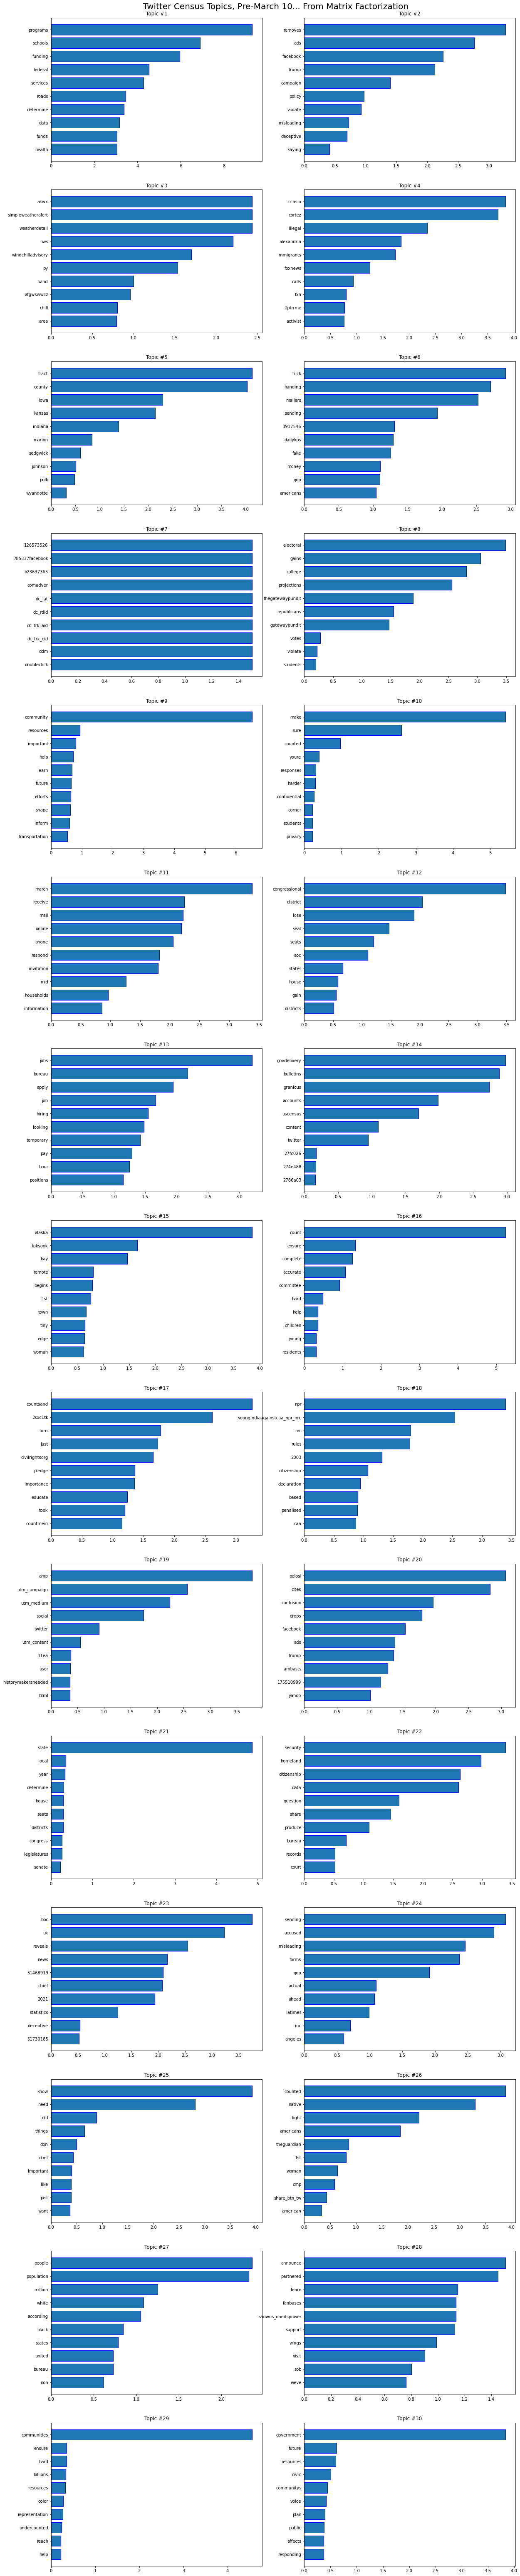

In [8]:
nmf = NMF(n_components=30)
X_nmf = nmf.fit_transform(X_scaled_pre)
top12 = nmf.components_
fig,ax = plt.subplots(15,2,figsize=(20,100))
axes = ax.ravel()
names = cv_pre.get_feature_names()
plt.rc('xtick', labelsize=10) 
plt.suptitle('Twitter Census Topics, Pre-March 10... From Matrix Factorization',size=20)
plt.subplots_adjust(top=0.975)
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()

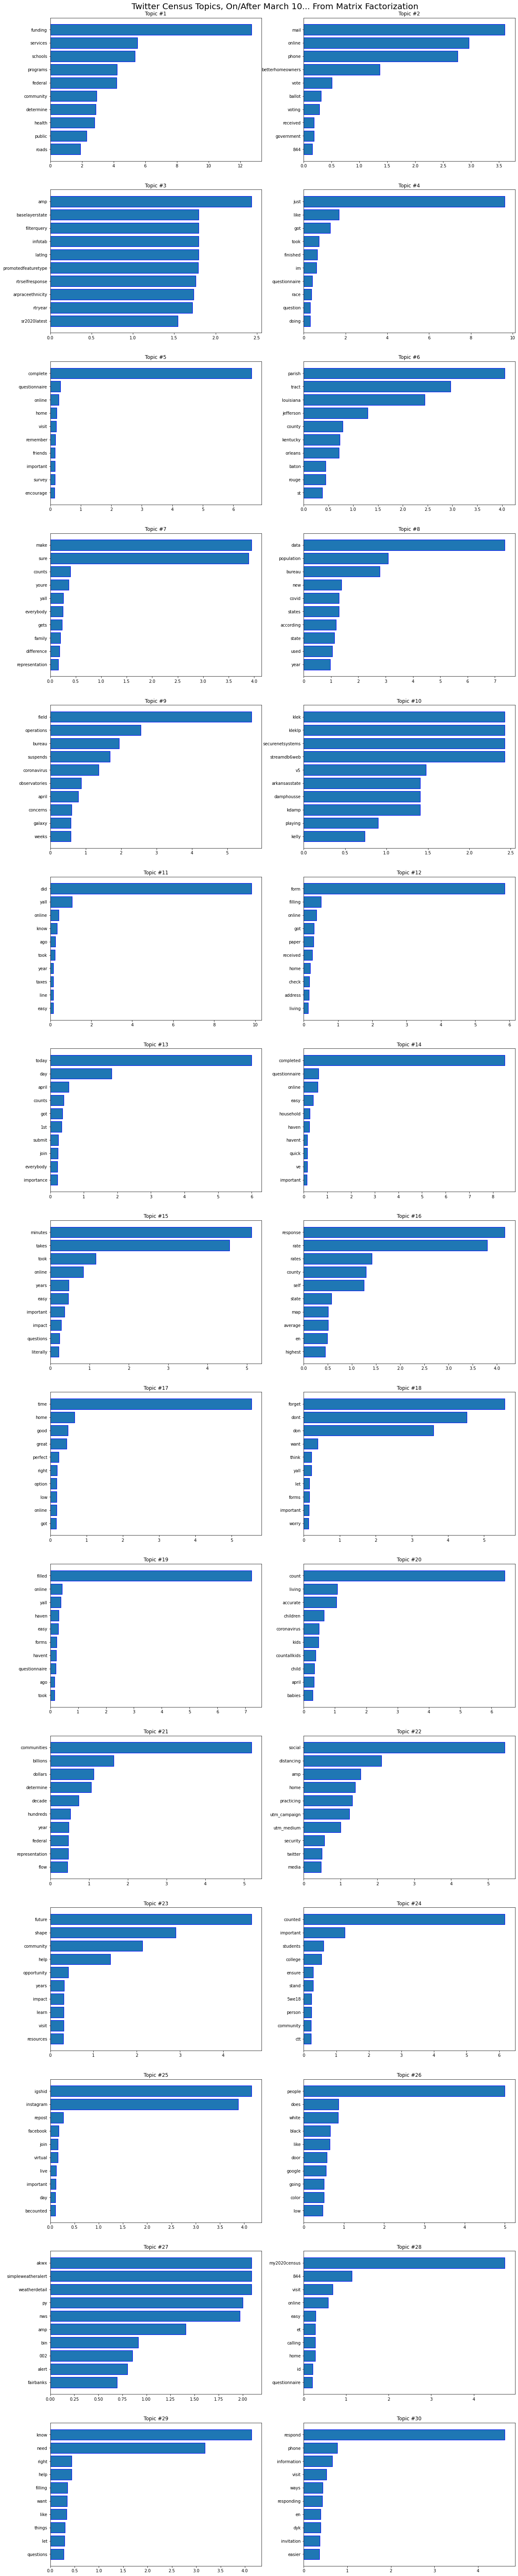

In [9]:
nmf = NMF(n_components=30)
X_nmf = nmf.fit_transform(X_scaled_post)
top12 = nmf.components_
fig,ax = plt.subplots(15,2,figsize=(20,100))
axes = ax.ravel()
names = cv_post.get_feature_names()
plt.rc('xtick', labelsize=10)  
plt.suptitle('Twitter Census Topics, On/After March 10... From Matrix Factorization',size=20)
plt.subplots_adjust(top=0.975)
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()

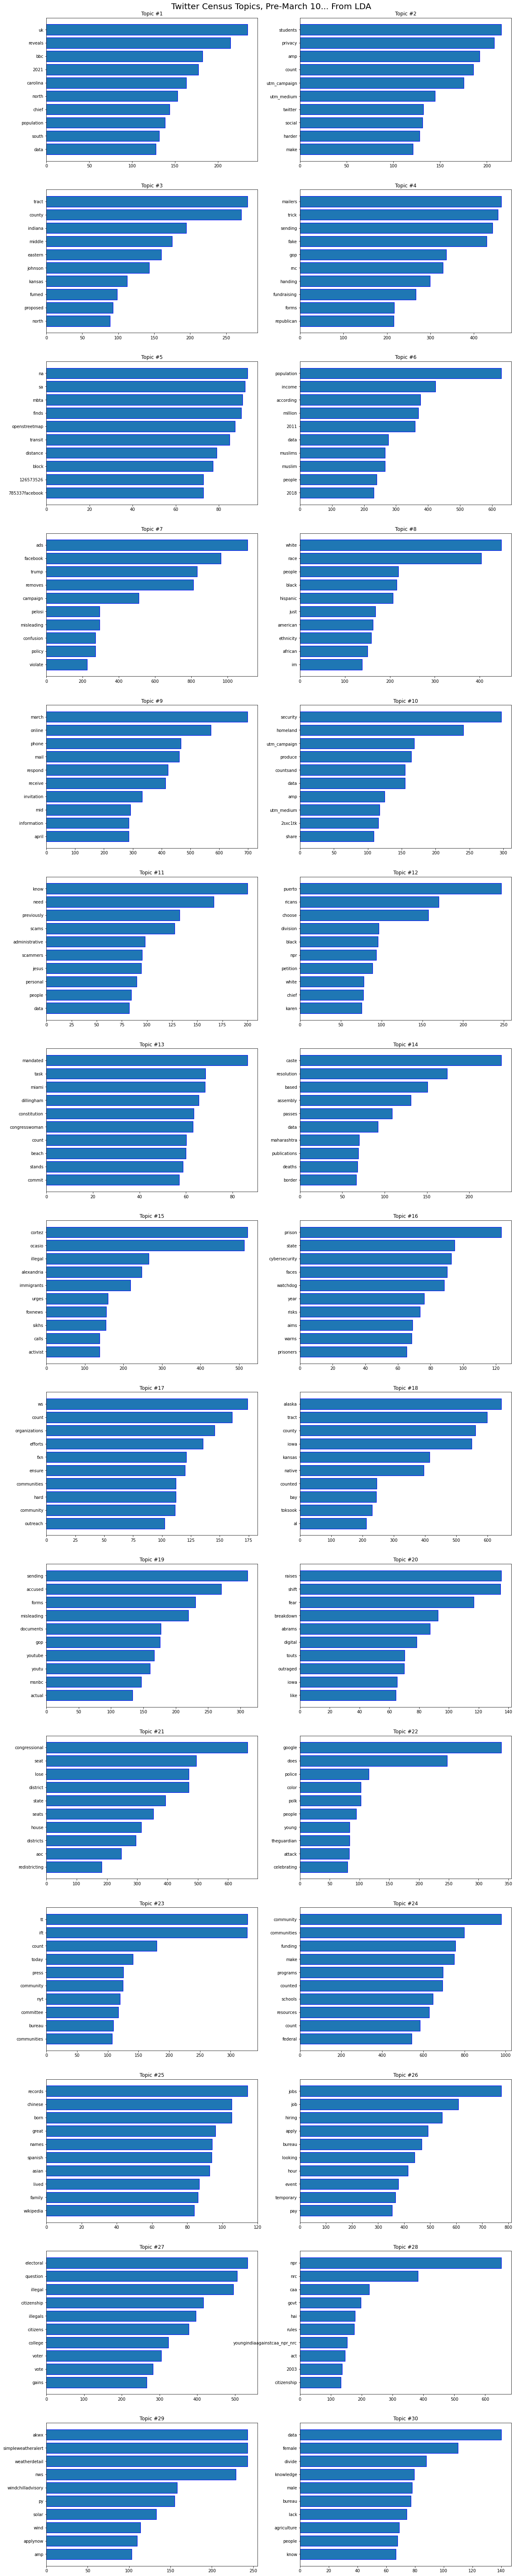

In [10]:
lda = LatentDirichletAllocation(n_components=30)
X_lda_ = lda.fit_transform(X_scaled_pre)
top12 = lda.components_
fig,ax = plt.subplots(15,2,figsize=(20,100))
axes = ax.ravel()
names = cv_pre.get_feature_names()
plt.rc('xtick', labelsize=10) 
plt.suptitle('Twitter Census Topics, Pre-March 10... From LDA',size=20)
plt.subplots_adjust(top=0.975)
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()

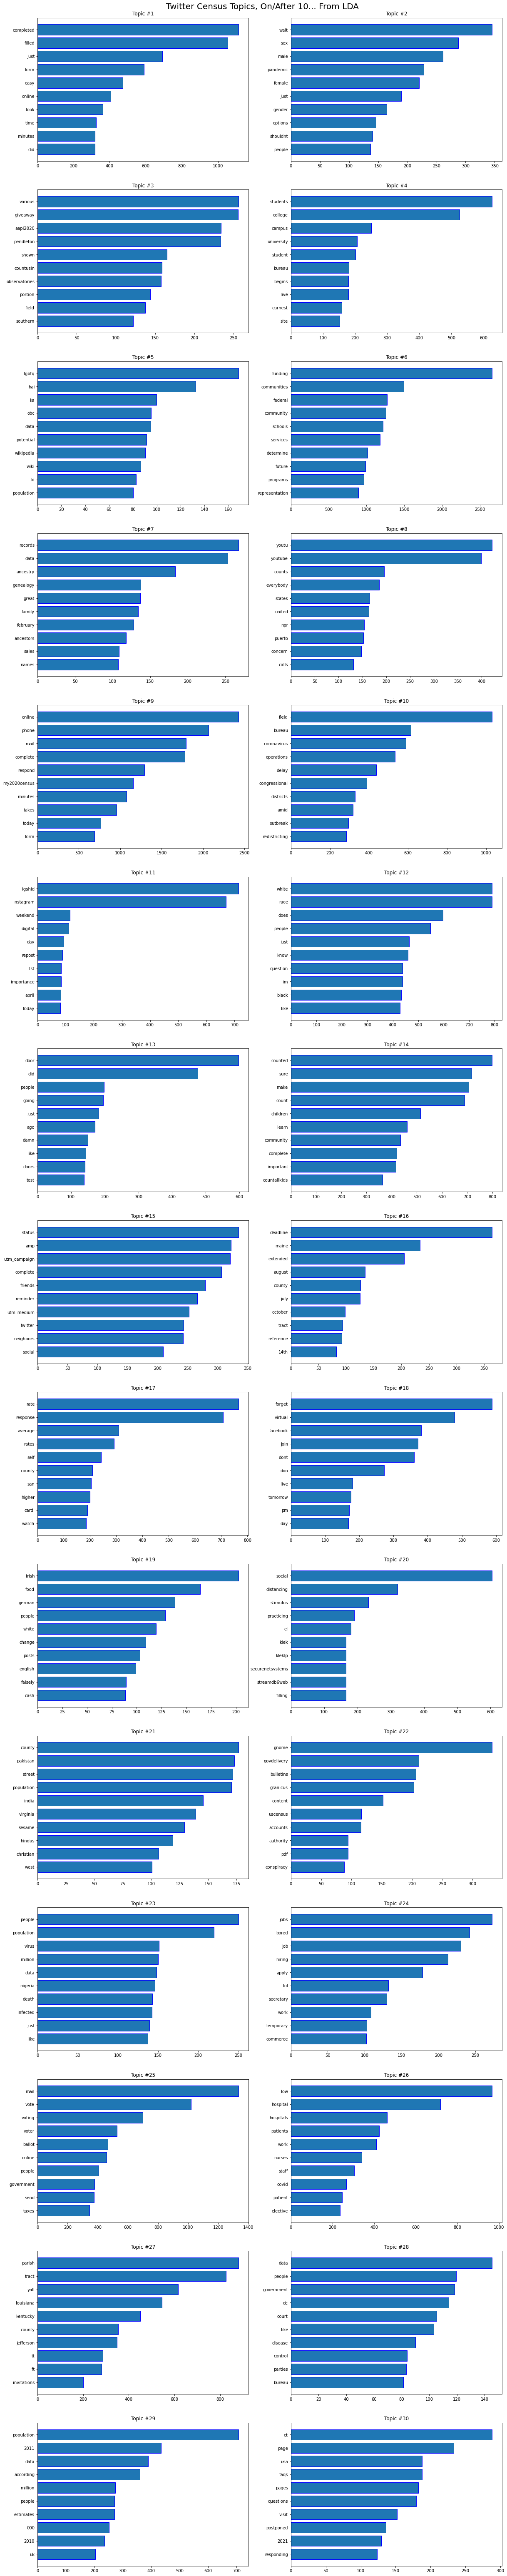

In [11]:
lda = LatentDirichletAllocation(n_components=30)
X_lda_ = lda.fit_transform(X_scaled_post)
top12 = lda.components_
fig,ax = plt.subplots(15,2,figsize=(20,100))
axes = ax.ravel()
names = cv_post.get_feature_names()
plt.rc('xtick', labelsize=10) 
plt.suptitle('Twitter Census Topics, On/After 10... From LDA',size=20)
plt.subplots_adjust(top=0.975)
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()

In [12]:
hashtags_pre = pre_covid.hashtags
hashtags_pre = hashtags_pre[~pd.isnull(hashtags_pre)]
hashtags_pre = hashtags_pre.str.replace('#','')
hashtags_pre = hashtags_pre.str.replace('census2020','')
hashtags_pre = hashtags_pre.str.replace('Census2020','')
hashtags_pre = hashtags_pre.str.replace('2020Census','')
hashtags_pre = hashtags_pre.str.replace('2020census','')
hashtags_pre = [x for x in hashtags_pre if isinstance(x,str)]

In [13]:
hashtags_post = post_covid.hashtags
hashtags_post = hashtags_post[~pd.isnull(hashtags_post)]
hashtags_post = hashtags_post.str.replace('#','')
hashtags_post = hashtags_post.str.replace('census2020','')
hashtags_post = hashtags_post.str.replace('Census2020','')
hashtags_post = hashtags_post.str.replace('2020Census','')
hashtags_post = hashtags_post.str.replace('2020census','')
hashtags_post = [x for x in hashtags_post if isinstance(x,str)]

<BarContainer object of 50 artists>

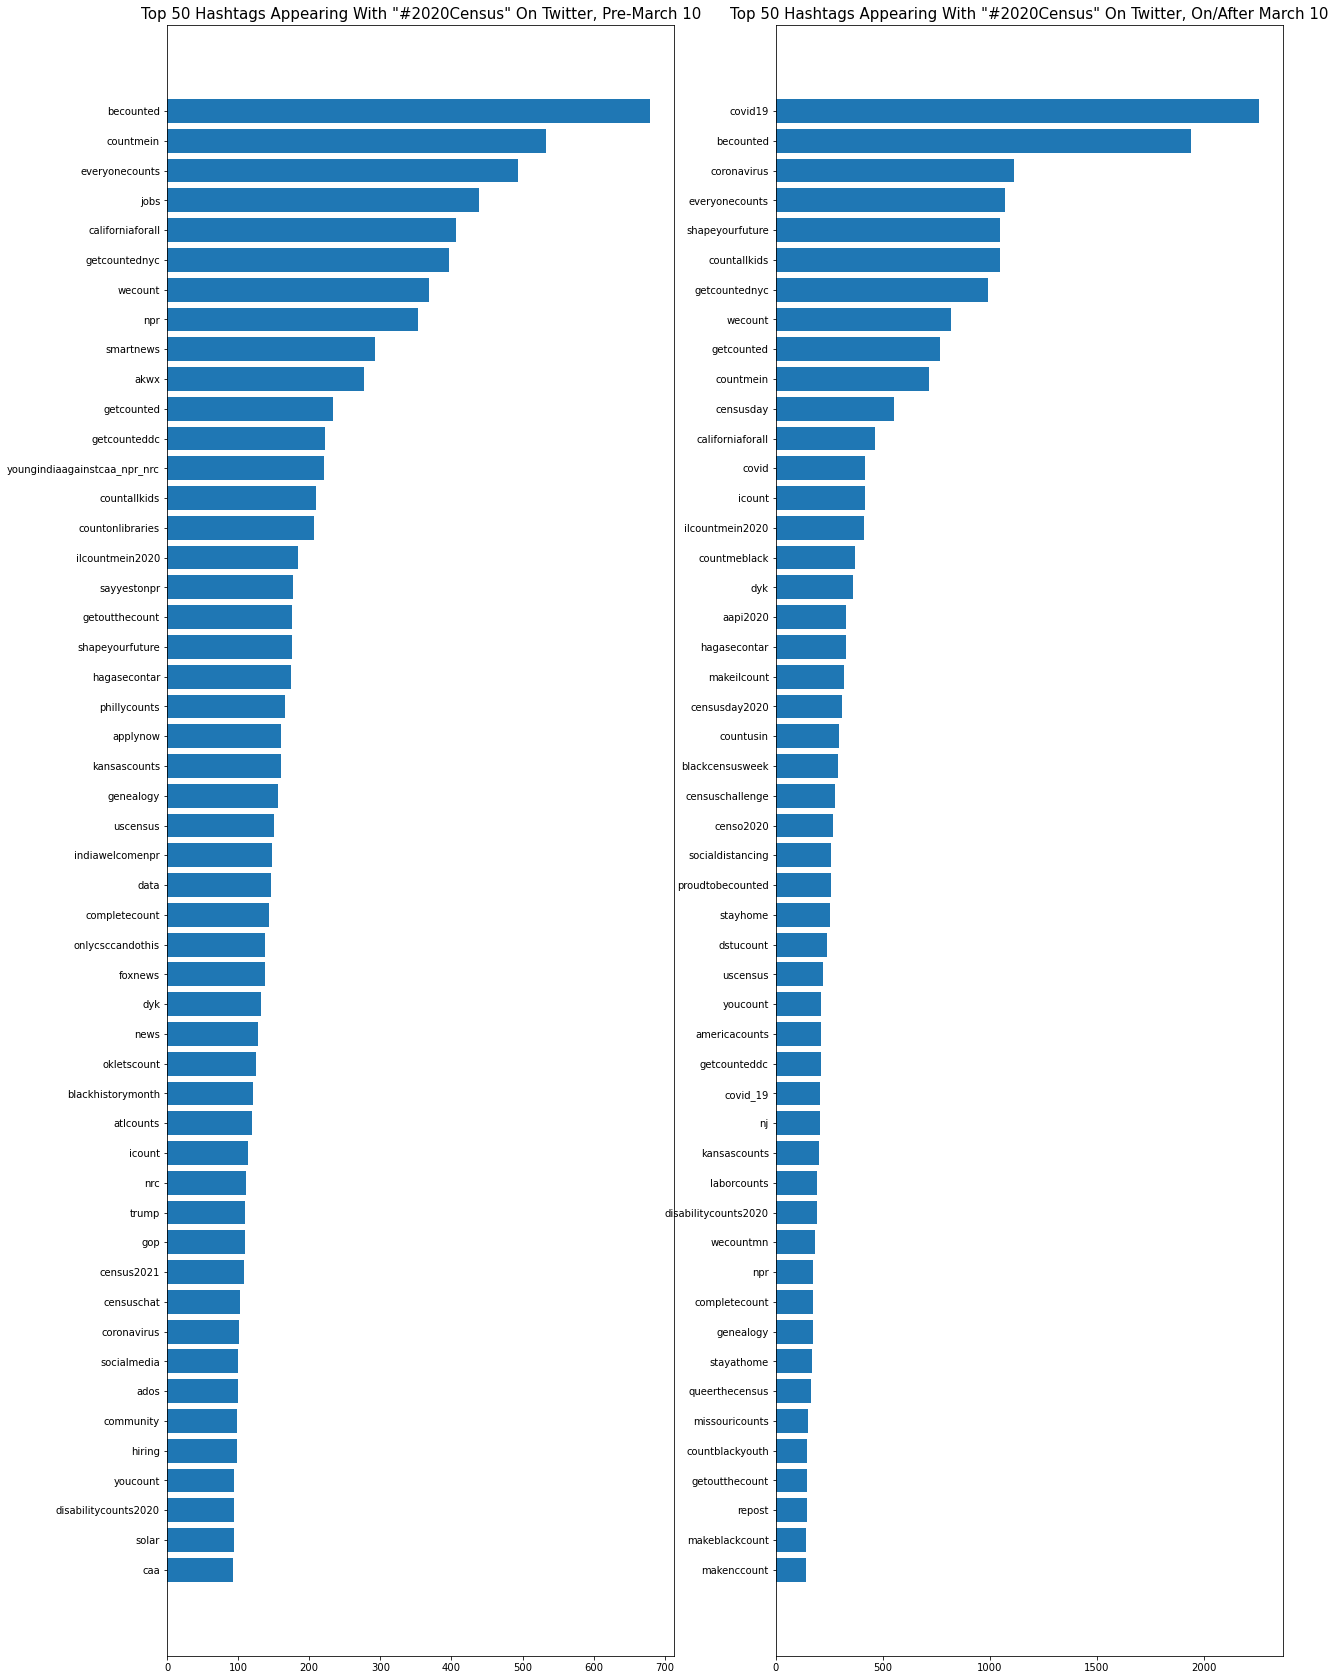

In [14]:
fig,axes = plt.subplots(1,2,figsize=(20,30))
ax = axes.ravel()
cv_pre = TfidfVectorizer(stop_words=stops,lowercase=True,strip_accents='ascii',min_df=10)
counts = cv_pre.fit_transform(hashtags_pre)
ax[0].set_title('Top 50 Hashtags Appearing With "#2020Census" On Twitter, Pre-March 10',size=15)
freq = pd.Series(np.sum(counts,axis=0).A1,index= cv_pre.get_feature_names())
top = freq.sort_values(ascending=False)[:50][::-1]
ax[0].barh(top.index,top.values)
cv_post = TfidfVectorizer(stop_words=stops,lowercase=True,strip_accents='ascii',min_df=10)
counts = cv_post.fit_transform(hashtags_post)
ax[1].set_title('Top 50 Hashtags Appearing With "#2020Census" On Twitter, On/After March 10',size=15)
freq = pd.Series(np.sum(counts,axis=0).A1,index= cv_post.get_feature_names())
top = freq.sort_values(ascending=False)[:50][::-1]
ax[1].barh(top.index,top.values)

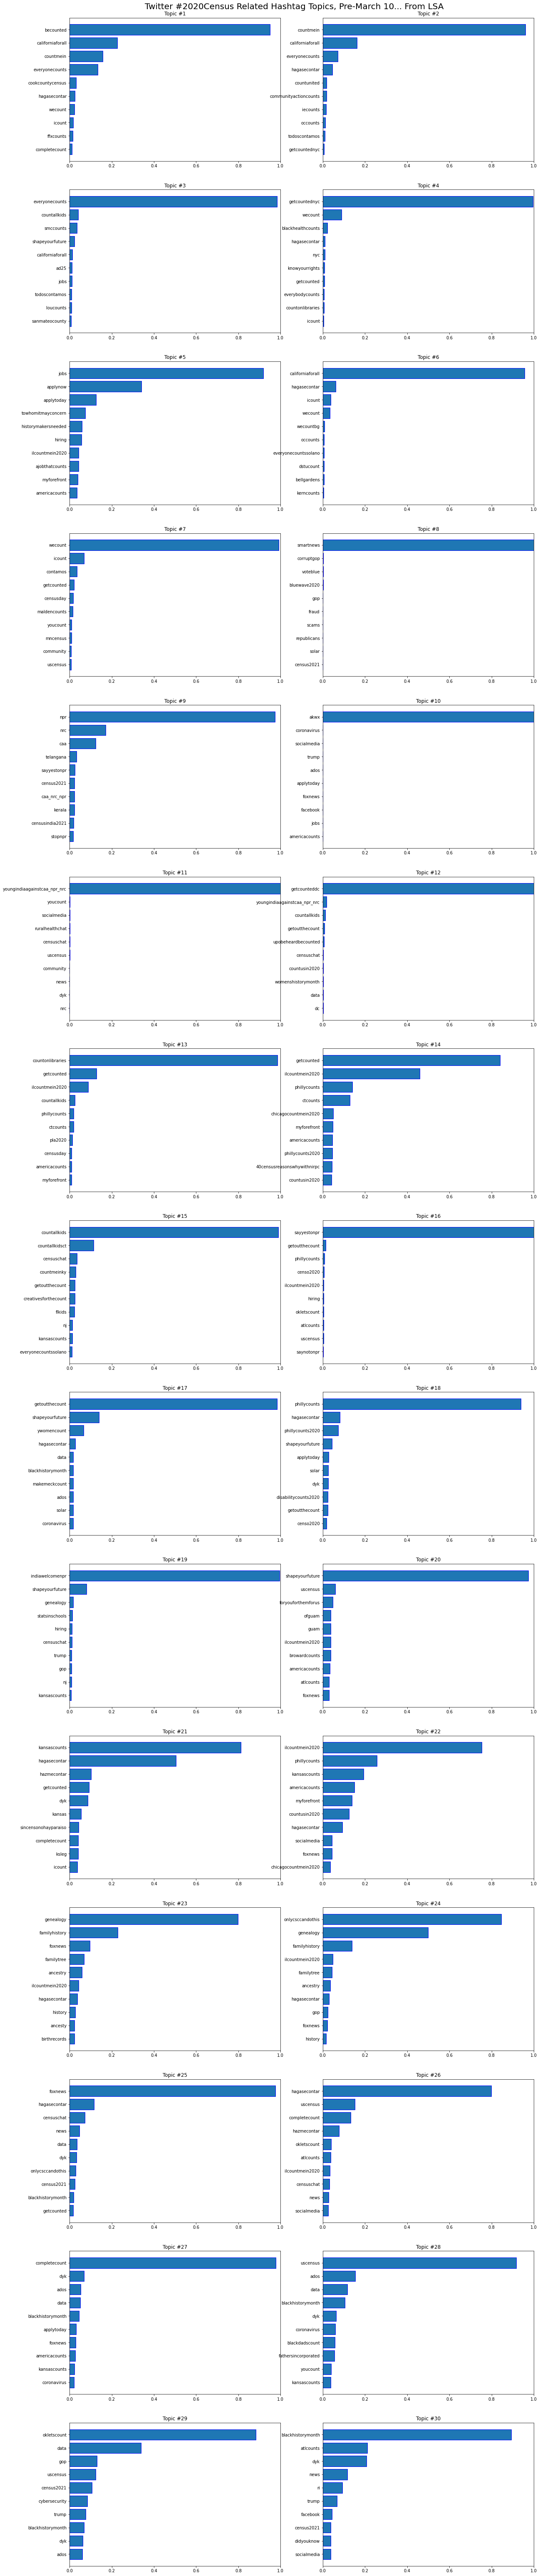

In [24]:
cv_pre = TfidfVectorizer(stop_words=stops,lowercase=True,strip_accents='ascii',min_df=10)
counts = cv_pre.fit_transform(hashtags_pre)
scaler = MaxAbsScaler()
X_scaled_pre = scaler.fit_transform(counts)
lsa = TruncatedSVD(n_components=30)
X_lsa = lsa.fit_transform(X_scaled_pre)
top12 = lsa.components_
fig,ax = plt.subplots(15,2,figsize=(20,100))
axes = ax.ravel()
names = cv_pre.get_feature_names()
plt.rc('xtick', labelsize=10) 
plt.suptitle('Twitter #2020Census Related Hashtag Topics, Pre-March 10... From LSA',size=20)
plt.subplots_adjust(top=0.975)
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()
    axes[i].set_xlim(0,1)

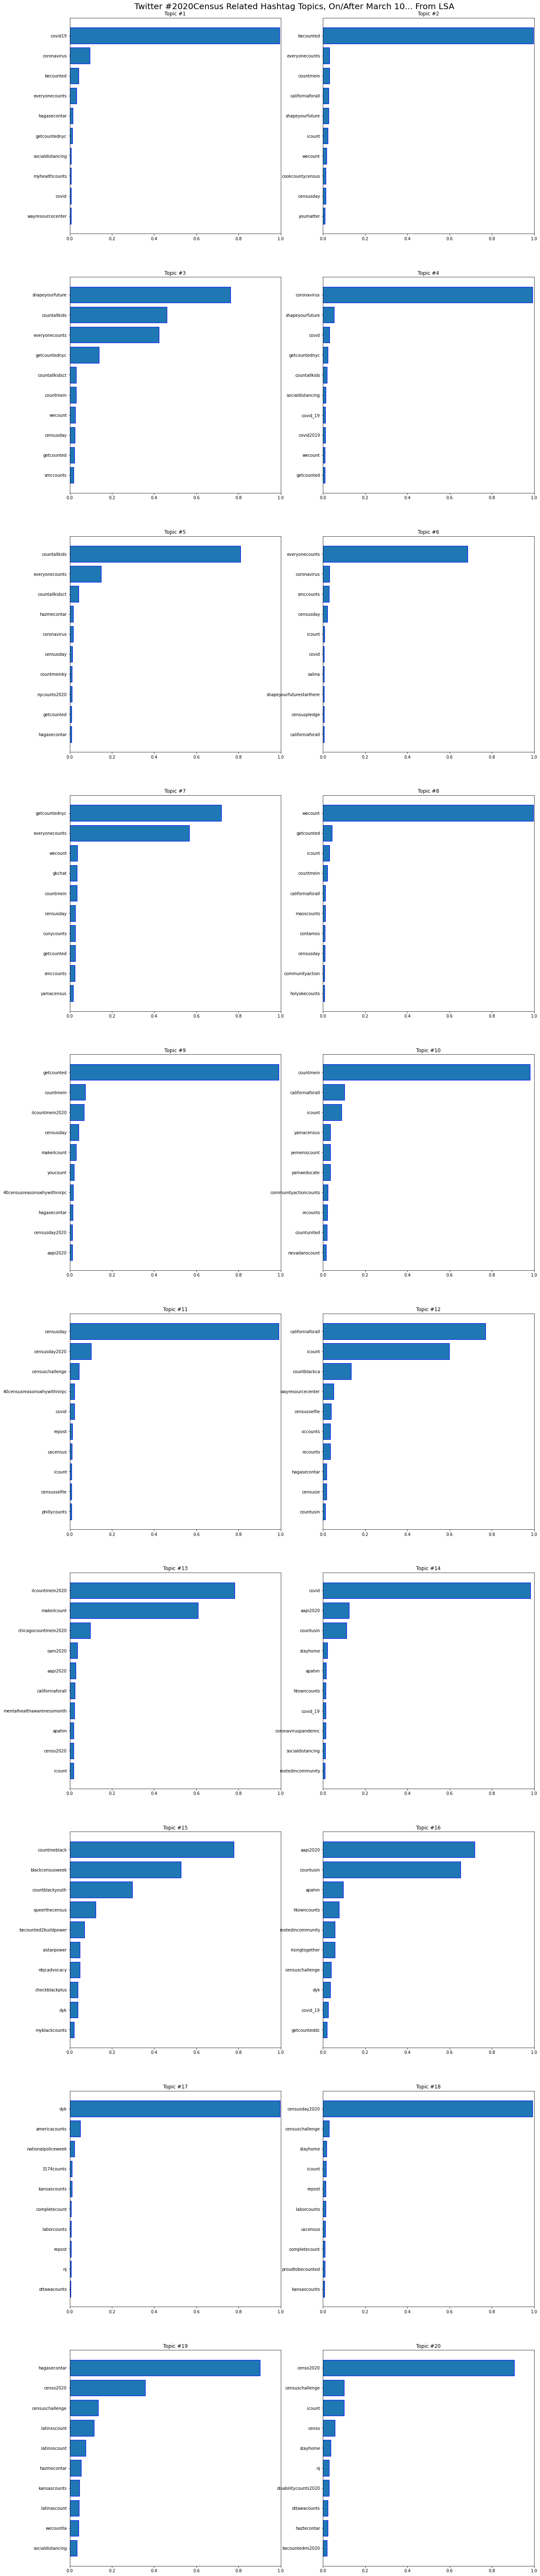

In [16]:
cv_post = TfidfVectorizer(stop_words=stops,lowercase=True,strip_accents='ascii',min_df=10)
counts = cv_post.fit_transform(hashtags_post)
scaler = MaxAbsScaler()
X_scaled_post = scaler.fit_transform(counts)
lsa = TruncatedSVD(n_components=30)
X_lsa = lsa.fit_transform(X_scaled_post)
top12 = lsa.components_
fig,ax = plt.subplots(10,2,figsize=(20,100))
axes = ax.ravel()
names = cv_post.get_feature_names()
plt.rc('xtick', labelsize=10)  
plt.suptitle('Twitter #2020Census Related Hashtag Topics, On/After March 10... From LSA',size=20)
plt.subplots_adjust(top=0.975)
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()
    axes[i].set_xlim(0,1)

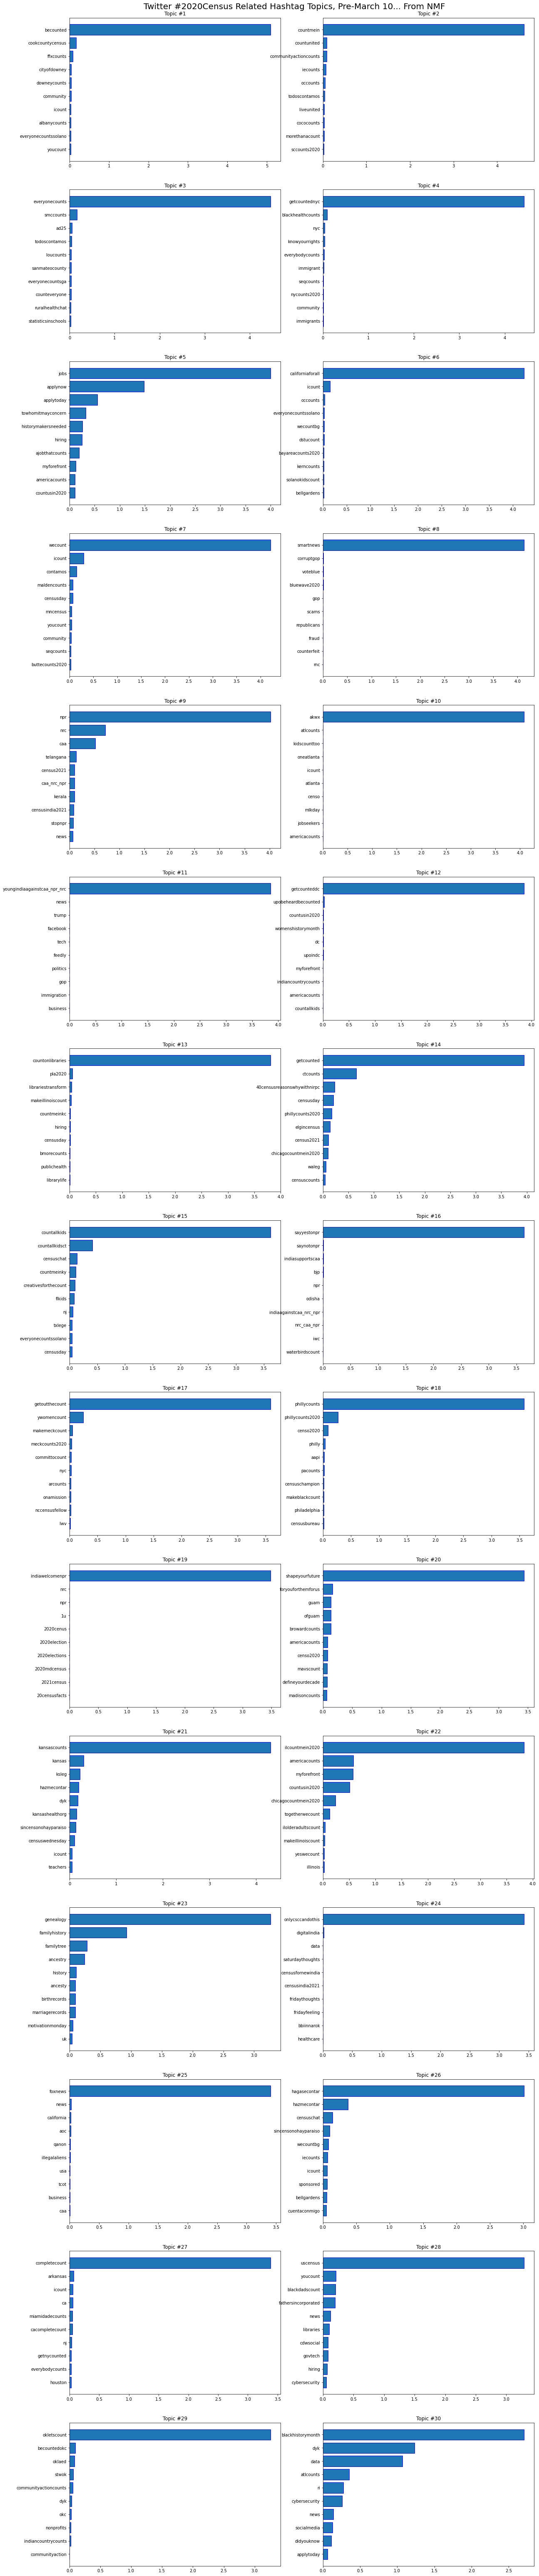

In [17]:
nmf = NMF(n_components=30)
X_nmf = nmf.fit_transform(X_scaled_pre)
top12 = nmf.components_
fig,ax = plt.subplots(15,2,figsize=(20,100))
axes = ax.ravel()
names = cv_pre.get_feature_names()
plt.rc('xtick', labelsize=10)
plt.suptitle('Twitter #2020Census Related Hashtag Topics, Pre-March 10... From NMF',size=20)
plt.subplots_adjust(top=0.975)
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()

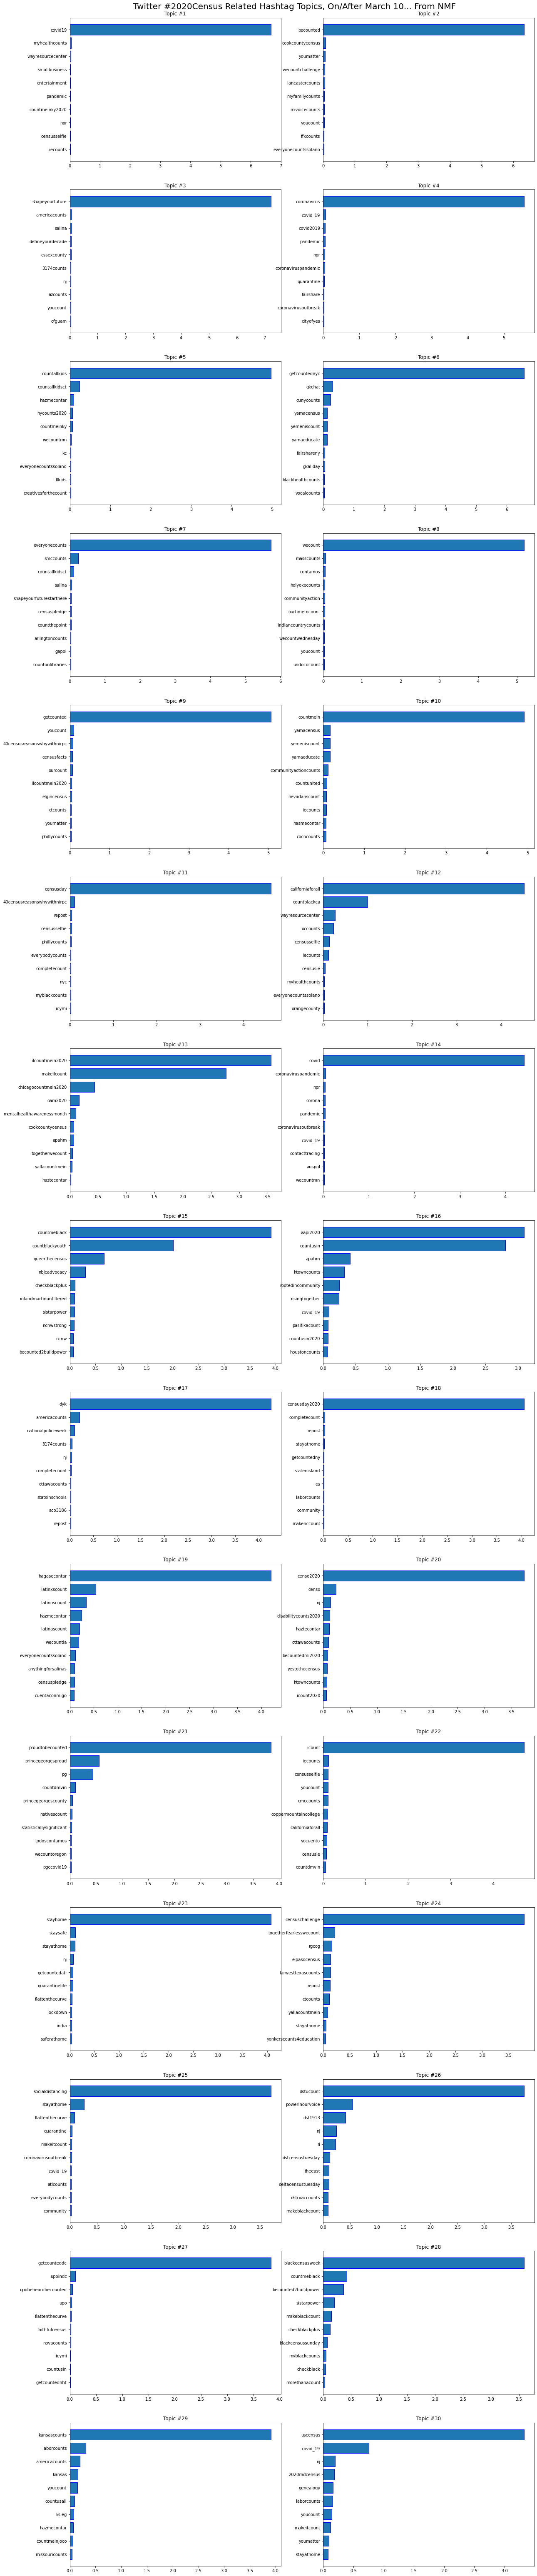

In [18]:
nmf = NMF(n_components=30)
X_nmf = nmf.fit_transform(X_scaled_post)
top12 = nmf.components_
fig,ax = plt.subplots(15,2,figsize=(20,100))
axes = ax.ravel()
names = cv_post.get_feature_names()
plt.rc('xtick', labelsize=10)
plt.suptitle('Twitter #2020Census Related Hashtag Topics, On/After March 10... From NMF',size=20)
plt.subplots_adjust(top=0.975)
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()

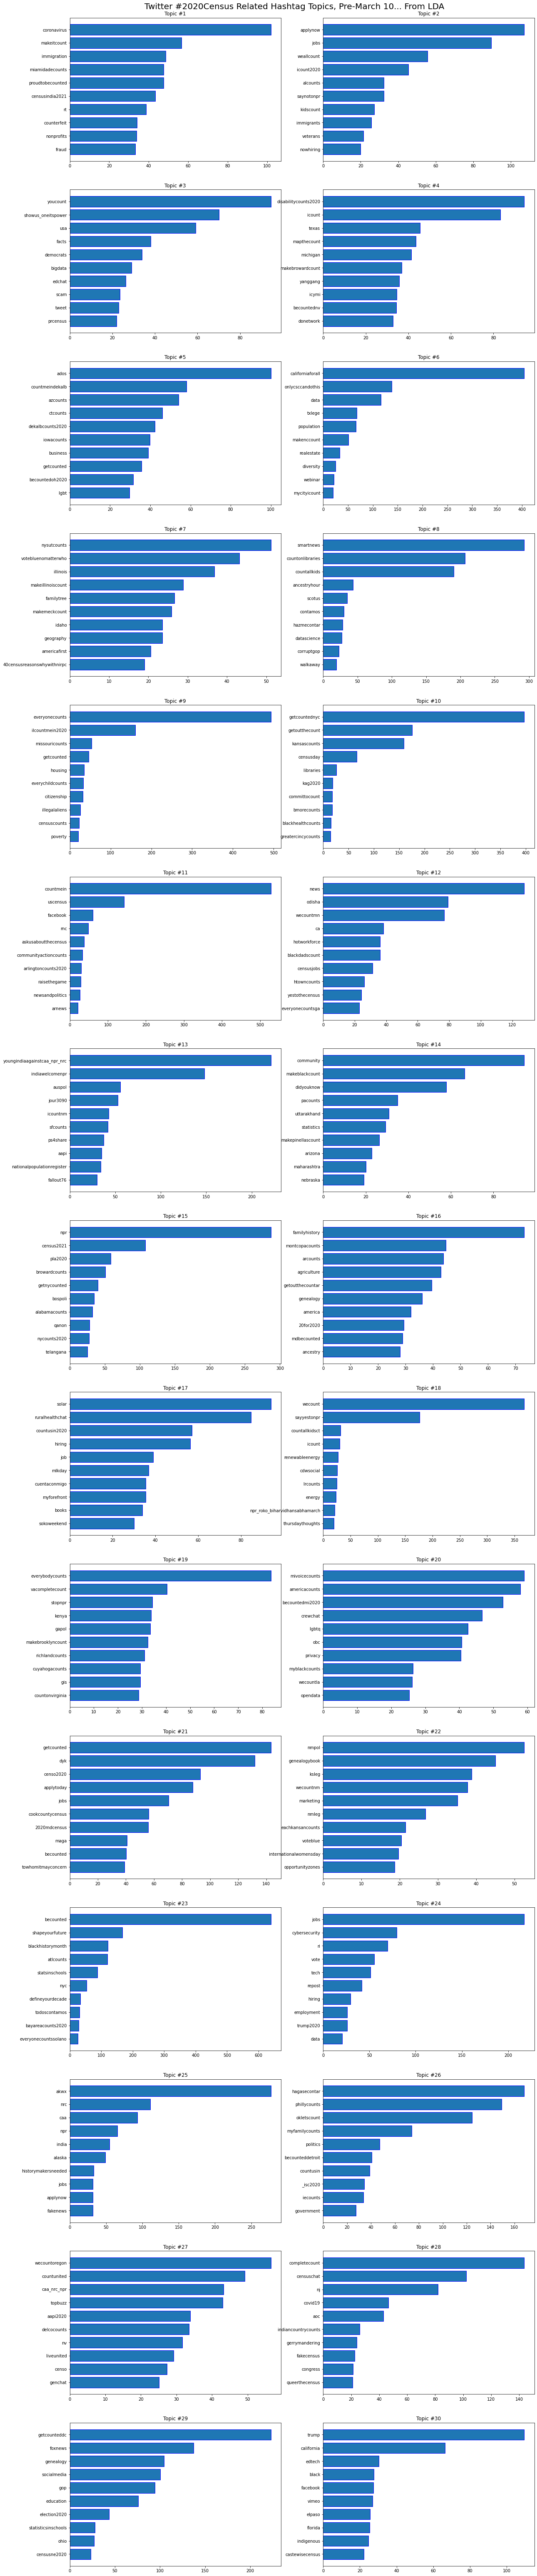

In [19]:
lda = LatentDirichletAllocation(n_components=30)
X_lda_ = lda.fit_transform(X_scaled_pre)
top12 = lda.components_
fig,ax = plt.subplots(15,2,figsize=(20,100))
axes = ax.ravel()
names = cv_pre.get_feature_names()
plt.rc('xtick', labelsize=10) 
plt.suptitle('Twitter #2020Census Related Hashtag Topics, Pre-March 10... From LDA',size=20)
plt.subplots_adjust(top=0.975)
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()

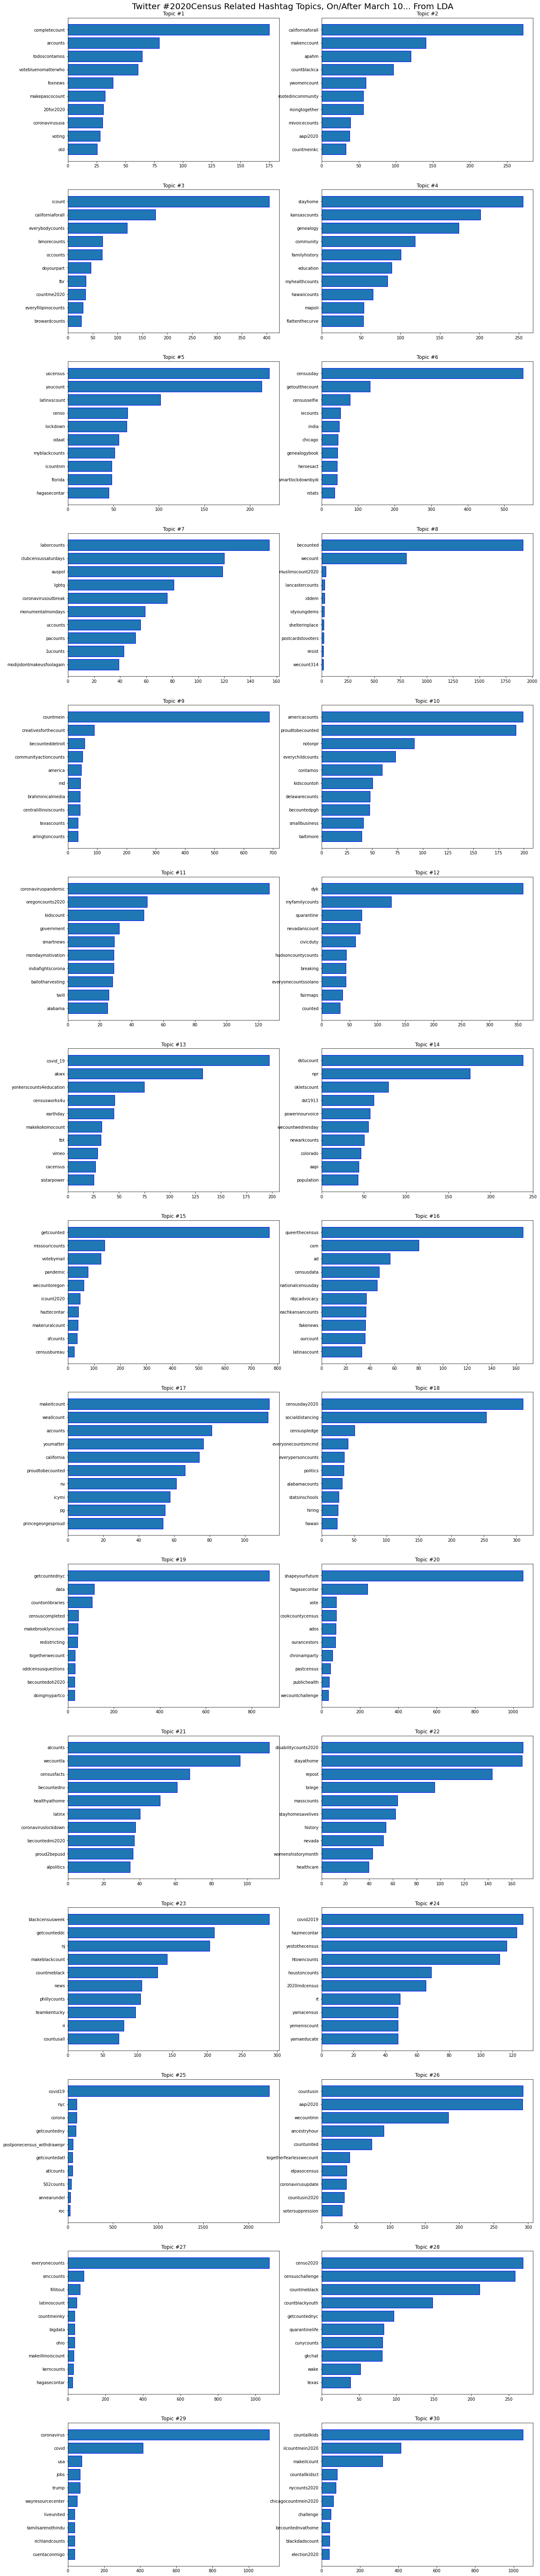

In [20]:
lda = LatentDirichletAllocation(n_components=30)
X_lda_ = lda.fit_transform(X_scaled_post)
top12 = lda.components_
fig,ax = plt.subplots(15,2,figsize=(20,100))
axes = ax.ravel()
names = cv_post.get_feature_names()
plt.rc('xtick', labelsize=10) 
plt.suptitle('Twitter #2020Census Related Hashtag Topics, On/After March 10... From LDA',size=20)
plt.subplots_adjust(top=0.975)
for i in range(len(axes)):
    allofem = pd.Series(top12[i],names).nlargest(10)
    axes[i].barh(allofem.index,allofem.values,edgecolor='b')
    axes[i].set_title('Topic #' + str(i+1))
    axes[i].invert_yaxis()

In [21]:
from_2010 = pd.read_csv('2010.csv',names=['date','activity'])
from_2010['date'] = pd.to_datetime(from_2010['date'].str.replace('/2010','/2000'))
from_2020 = pd.read_csv('2020.csv',names=['date','activity'])
from_2020['date'] = pd.to_datetime(from_2020['date'].str.replace('/2020','/2000'))


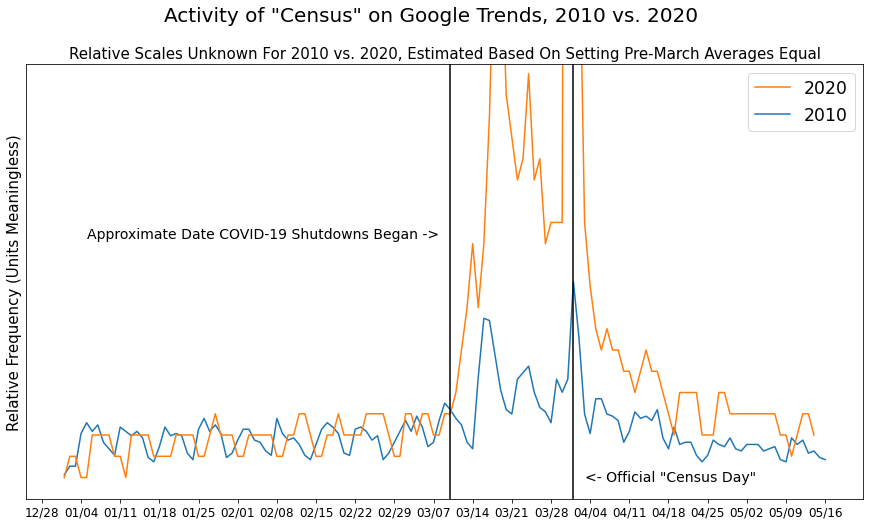

In [22]:
divider = sum(from_2010[:59].activity) / sum(from_2020[:59].activity)
divider

plt.figure(figsize=(15,8))
ax = plt.gca()
line1 = plt.plot(from_2010.date,from_2010.activity,label='2010')
line2 = plt.plot(from_2020.date,from_2020.activity*divider,label='2020')
plt.axvline(x=pd.to_datetime('2000-03-10'),color='black')
plt.axvline(x=pd.to_datetime('2000-04-01'),color='black')
plt.ylim(0,200)
plt.suptitle('Activity of "Census" on Google Trends, 2010 vs. 2020',size=20)
plt.title('Relative Scales Unknown For 2010 vs. 2020, Estimated Based On Setting Pre-March Averages Equal',size=15)
plt.ylabel('Relative Frequency (Units Meaningless)',size=15)
plt.yticks([])
plt.xticks(size=12)
plt.text(pd.to_datetime('2000-01-05'),120,'Approximate Date COVID-19 Shutdowns Began ->',size=14)
plt.text(pd.to_datetime('2000-04-03'),8,'<- Official "Census Day"',size=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],fontsize='xx-large')
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(WeekdayLocator(interval=1))

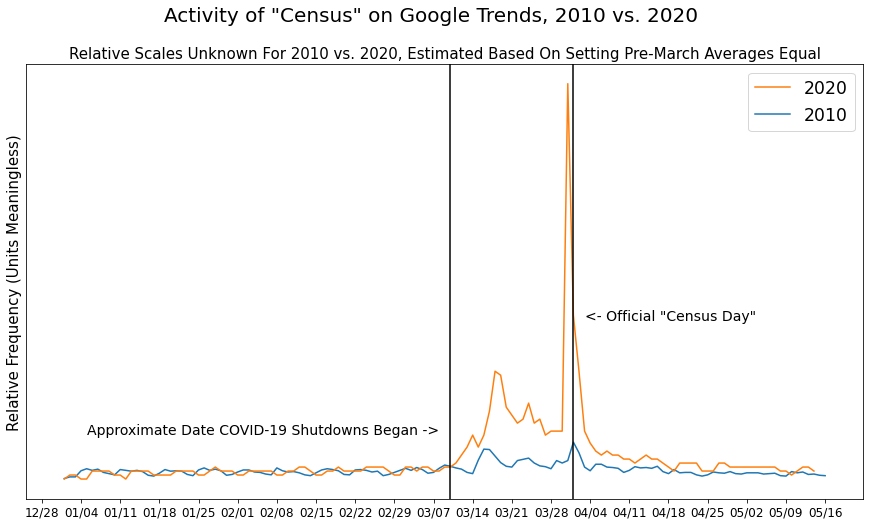

In [23]:
plt.figure(figsize=(15,8))
ax = plt.gca()
line1 = plt.plot(from_2010.date,from_2010.activity,label='2010')
line2 = plt.plot(from_2020.date,from_2020.activity*divider,label='2020')
plt.axvline(x=pd.to_datetime('2000-03-10'),color='black')
plt.axvline(x=pd.to_datetime('2000-04-01'),color='black')
plt.suptitle('Activity of "Census" on Google Trends, 2010 vs. 2020',size=20)
plt.title('Relative Scales Unknown For 2010 vs. 2020, Estimated Based On Setting Pre-March Averages Equal',size=15)
plt.ylabel('Relative Frequency (Units Meaningless)',size=15)
plt.yticks([])
plt.xticks(size=12)
plt.text(pd.to_datetime('2000-01-05'),120,'Approximate Date COVID-19 Shutdowns Began ->',size=14)
plt.text(pd.to_datetime('2000-04-03'),400,'<- Official "Census Day"',size=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],fontsize='xx-large')
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(WeekdayLocator(interval=1))